Solving for n = 60...
Solving for n = 107...
Solving for n = 80...


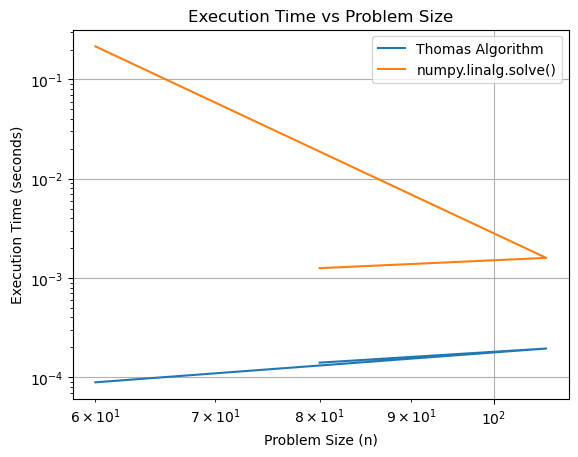

In [1]:
import numpy as np
import scipy.sparse as sp
import timeit
import matplotlib.pyplot as plt

# Thomas algorithm implementation
def thomas_algorithm(A, B, C, f):
    n = len(f)
    x = [0] * n
    P = [0] * n
    Q = [0] * n
    
    # Forward Elimination
    P[0] = -C[0] / A[0]
    Q[0] = f[0] / A[0]
    for i in range(1, n):
        denominator = A[i] + B[i-1] * P[i-1]
        if i < n - 1:
            P[i] = -C[i] / denominator
        Q[i] = (f[i] - B[i-1] * Q[i-1]) / denominator
    
    # Backsubstitution
    x[n-1] = Q[n-1]
    for i in range(n-2, -1, -1):
        x[i] = P[i] * x[i+1] + Q[i]
    
    return x

# Problem sizes
problem_sizes = [10*6, 107, 10*8]

# Record execution times for each problem size
thomas_times = []
numpy_times = []

for n in problem_sizes:
    print(f"Solving for n = {n}...")
    
    # Set up coefficients and right-hand side
    A = [2] * n
    B = [-1] * (n - 1)
    C = [-1] * (n - 1)
    f = [1] * n
    
    # Time Thomas algorithm
    start_time = timeit.default_timer()
    thomas_solution = thomas_algorithm(A, B, C, f)
    thomas_exec_time = timeit.default_timer() - start_time
    thomas_times.append(thomas_exec_time)
    
    # Time numpy.linalg.solve()
    start_time = timeit.default_timer()
    coeff_matrix = sp.diags([A, B, C], [0, -1, 1], format='csr')
    numpy_solution = sp.linalg.spsolve(coeff_matrix, f)
    numpy_exec_time = timeit.default_timer() - start_time
    numpy_times.append(numpy_exec_time)

# Plot execution times
plt.plot(problem_sizes, thomas_times, label="Thomas Algorithm")
plt.plot(problem_sizes, numpy_times, label="numpy.linalg.solve()")
plt.xlabel('Problem Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Problem Size')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()